# Importing the required modules for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv') #reading the csv file

# Performing Statistical Analysis

In [3]:
df.head() #checking the column heads

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,237519.0,2006.500448,3.452240,2001.0,2004.0,2007.0,2010.0,2012.0
Total,237519.0,55.034477,792.749038,0.0,0.0,0.0,6.0,63343.0


In [6]:
df.isnull().sum() #checking for missing values in the data. No missing values found

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# Data Wrangling 

In [7]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [8]:
df.replace('Delhi (Ut)', 'Delhi', inplace=True) #renaming the state

In [9]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)
#dropping the irrelevant total state info from the state column

# Exploratory Data Analysis

In [10]:
# Dropping rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [11]:
df['State'].value_counts()

Andhra Pradesh       5185
Karnataka            5115
Tamil Nadu           5054
Madhya Pradesh       5029
Maharashtra          4958
Uttar Pradesh        4954
Gujarat              4856
West Bengal          4596
Kerala               4509
Chhattisgarh         4368
Rajasthan            4324
Odisha               4179
Assam                3868
Haryana              3826
Delhi                3324
Jharkhand            3210
Bihar                3119
Punjab               2960
Himachal Pradesh     2650
Tripura              2451
Uttarakhand          2442
Goa                  2237
Jammu & Kashmir      2159
Puducherry           2124
Sikkim               1421
A & N Islands        1299
Meghalaya            1180
Chandigarh           1092
Arunachal Pradesh    1062
D & N Haveli          952
Mizoram               786
Manipur               609
Nagaland              587
Daman & Diu           579
Lakshadweep            46
Name: State, dtype: int64

In [12]:
grp = df.groupby('State')['Total'].sum() #grouping the dataset by states and number of suicides.

In [13]:
#creating a dataframe and sorting the values in descending order
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total', ascending = False) 


In [14]:
total_suicides

,State,Total
20,Maharashtra,901945
34,West Bengal,849936
30,Tamil Nadu,818691
1,Andhra Pradesh,814059
16,Karnataka,734825
17,Kerala,538946
19,Madhya Pradesh,451535
11,Gujarat,330858
6,Chhattisgarh,302354
25,Odisha,267234


[Text(0, 0, 'Maharashtra'),
 Text(1, 0, 'West Bengal'),
 Text(2, 0, 'Tamil Nadu'),
 Text(3, 0, 'Andhra Pradesh'),
 Text(4, 0, 'Karnataka'),
 Text(5, 0, 'Kerala'),
 Text(6, 0, 'Madhya Pradesh'),
 Text(7, 0, 'Gujarat'),
 Text(8, 0, 'Chhattisgarh'),
 Text(9, 0, 'Odisha'),
 Text(10, 0, 'Rajasthan'),
 Text(11, 0, 'Uttar Pradesh'),
 Text(12, 0, 'Assam'),
 Text(13, 0, 'Haryana'),
 Text(14, 0, 'Delhi'),
 Text(15, 0, 'Jharkhand'),
 Text(16, 0, 'Punjab'),
 Text(17, 0, 'Bihar'),
 Text(18, 0, 'Tripura'),
 Text(19, 0, 'Puducherry'),
 Text(20, 0, 'Himachal Pradesh'),
 Text(21, 0, 'Uttarakhand'),
 Text(22, 0, 'Goa'),
 Text(23, 0, 'Jammu & Kashmir'),
 Text(24, 0, 'Sikkim'),
 Text(25, 0, 'A & N Islands'),
 Text(26, 0, 'Arunachal Pradesh'),
 Text(27, 0, 'Meghalaya'),
 Text(28, 0, 'Chandigarh'),
 Text(29, 0, 'Mizoram'),
 Text(30, 0, 'D & N Haveli'),
 Text(31, 0, 'Manipur'),
 Text(32, 0, 'Nagaland'),
 Text(33, 0, 'Daman & Diu'),
 Text(34, 0, 'Lakshadweep')]

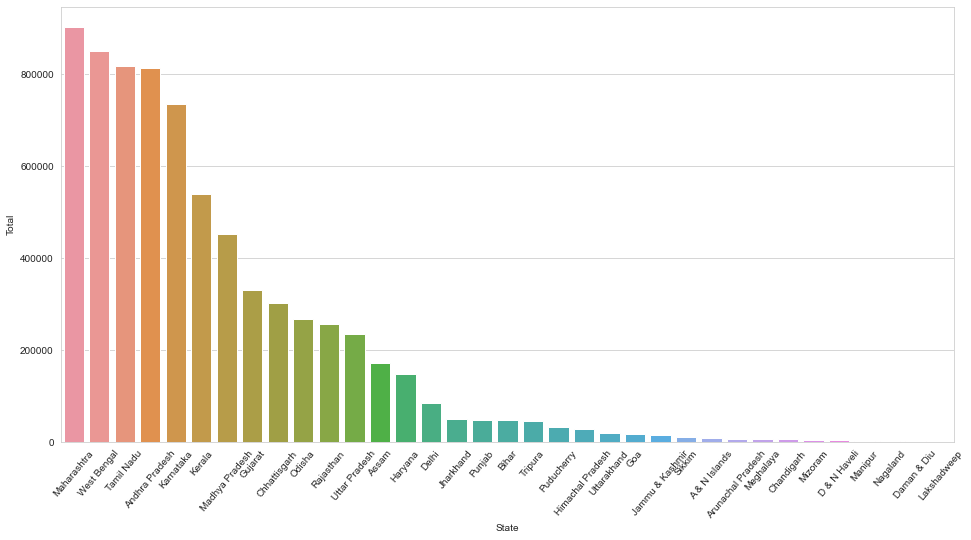

In [15]:
# Plotting the frequency distribution of suicides per state.
fig , ax = plt.subplots(figsize=(16,8))
g = sns.barplot(x = 'State', y = 'Total', data = total_suicides)
g.set_xticklabels(g.get_xticklabels(), rotation = 50)



As we can see from the above visualization, the top three states with the highest suicide rates are: Maharashtra, West Bengal and Tamil Nadu.

In [16]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [17]:
df['Year'].value_counts()

2009    8718
2010    8713
2011    8637
2012    8467
2002    8377
2003    8375
2008    8367
2005    8353
2007    8347
2006    8318
2001    8309
2004    8129
Name: Year, dtype: int64

In [18]:
year = df.groupby('Year')['Total'].sum() #grouping the dataset by year and total number of suicides.

In [19]:
year

Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64

In [20]:
#creating a dataframe and sorting the values in descending order for total suicides per year
total_suicides_year = pd.DataFrame(year).reset_index().sort_values('Total', ascending = False)

In [21]:
total_suicides_year

,Year,Total
10,2011,677159
9,2010,672926
11,2012,647288
8,2009,635429
7,2008,625014
6,2007,613119
5,2006,590543
4,2005,569545
3,2004,568349
2,2003,554218


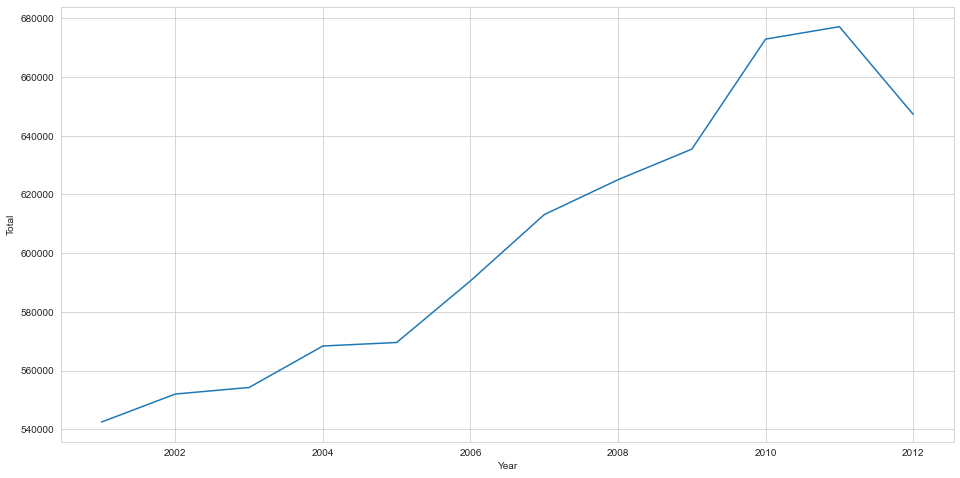

In [22]:
#Plotting the frequency distribution of suicides per year
fig, ax = plt.subplots(figsize=(16,8))
g = sns.lineplot(x = 'Year', y = 'Total', data = total_suicides_year, palette = 'viridis')



From the above graph, we can clearly observe the trends that the suicide rates were far lower starting from 2002 then it started to rise fairly quickly from 2003 and had a sharp rise from 2005 onwards and continued to increase till 2011(the highest suicide rates), then started dropping from 2012.

In [23]:
df['Age_group'].value_counts()

15-29     24960
30-44     24064
45-59     19730
60+       13766
0-14       9639
0-100+     8951
Name: Age_group, dtype: int64

Removing the 0-100 age from the age group because it's fairly understood that most people die around that age and hence is irrelevant for our analysis.

In [24]:
df_age = df[df['Age_group'] != '0-100+']
age = df_age.groupby('Age_group')['Total'].sum()

In [25]:
#creating a dataframe and sorting the values in descending order for total suicides per age-group
suicides_age = pd.DataFrame(age).reset_index().sort_values('Total', ascending = False)

In [26]:
suicides_age

,Age_group,Total
1,15-29,1534037
2,30-44,1471599
3,45-59,885177
4,60+,346925
0,0-14,98410


[Text(0, 0, '15-29'),
 Text(1, 0, '30-44'),
 Text(2, 0, '45-59'),
 Text(3, 0, '60+'),
 Text(4, 0, '0-14')]

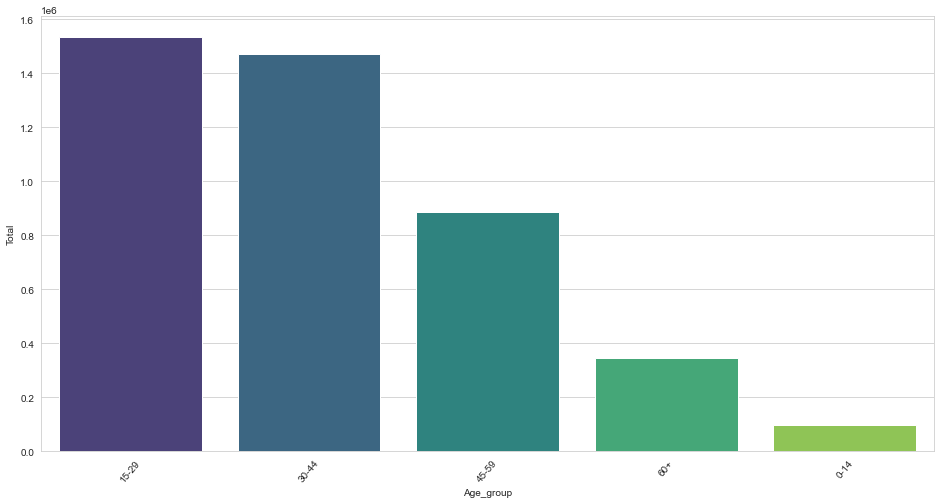

In [27]:
#Plotting the frequency distribution of suicides per age-group
fig, ax = plt.subplots(figsize=(16,8))
g = sns.barplot(x = 'Age_group', y = 'Total', data = suicides_age, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 50)

 From the above graph, we can clealry see that the age group between 15-29 was at the top to have committed suicides.

In [28]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


<AxesSubplot:xlabel='Gender', ylabel='count'>

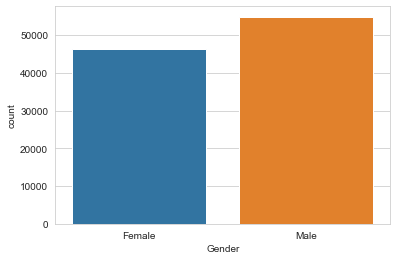

In [29]:
#Plotting the frequency of suicides based on gender
sns.countplot(x = 'Gender',data = df)

We can see that the males in india have committed more suicides than the females. 

In [30]:
df["Type_code"].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

Now, let's analyse the different causes and the subcauses associated with it.

In [31]:
#Breaking down the type codes to different dataframes based on the unqiue types present.
cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [32]:
#grouping the cause dataset by type and creating a new dataframe for plotting.
filter_by_cause = cause.groupby('Type')['Total'].sum()
suicide_reasons_cause = pd.DataFrame(filter_by_cause).reset_index().sort_values('Total', ascending = False)

In [33]:
suicide_reasons_cause

,Type,Total
11,Family Problems,341952
4,Causes Not known,237069
19,Other Causes (Please Specity),216050
20,Other Prolonged Illness,194565
15,Insanity/Mental Illness,94229
16,Love Affairs,45039
0,Bankruptcy or Sudden change in Economic,32755
23,Poverty,32684
7,Dowry Dispute,31970
8,Drug Abuse/Addiction,30046


[Text(0, 0, 'Family Problems'),
 Text(1, 0, 'Causes Not known'),
 Text(2, 0, 'Other Causes (Please Specity)'),
 Text(3, 0, 'Other Prolonged Illness'),
 Text(4, 0, 'Insanity/Mental Illness'),
 Text(5, 0, 'Love Affairs'),
 Text(6, 0, 'Bankruptcy or Sudden change in Economic'),
 Text(7, 0, 'Poverty'),
 Text(8, 0, 'Dowry Dispute'),
 Text(9, 0, 'Drug Abuse/Addiction'),
 Text(10, 0, 'Unemployment'),
 Text(11, 0, 'Failure in Examination'),
 Text(12, 0, 'Property Dispute'),
 Text(13, 0, 'Suspected/Illicit Relation'),
 Text(14, 0, 'Fall in Social Reputation'),
 Text(15, 0, 'Professional/Career Problem'),
 Text(16, 0, 'Cancellation/Non-Settlement of Marriage'),
 Text(17, 0, 'Death of Dear Person'),
 Text(18, 0, 'Cancer'),
 Text(19, 0, 'Illness (Aids/STD)'),
 Text(20, 0, 'Not having Children(Barrenness/Impotency'),
 Text(21, 0, 'Paralysis'),
 Text(22, 0, 'Divorce'),
 Text(23, 0, 'Physical Abuse (Rape/Incest Etc.)'),
 Text(24, 0, 'Bankruptcy or Sudden change in Economic Status'),
 Text(25, 0, 'Ill

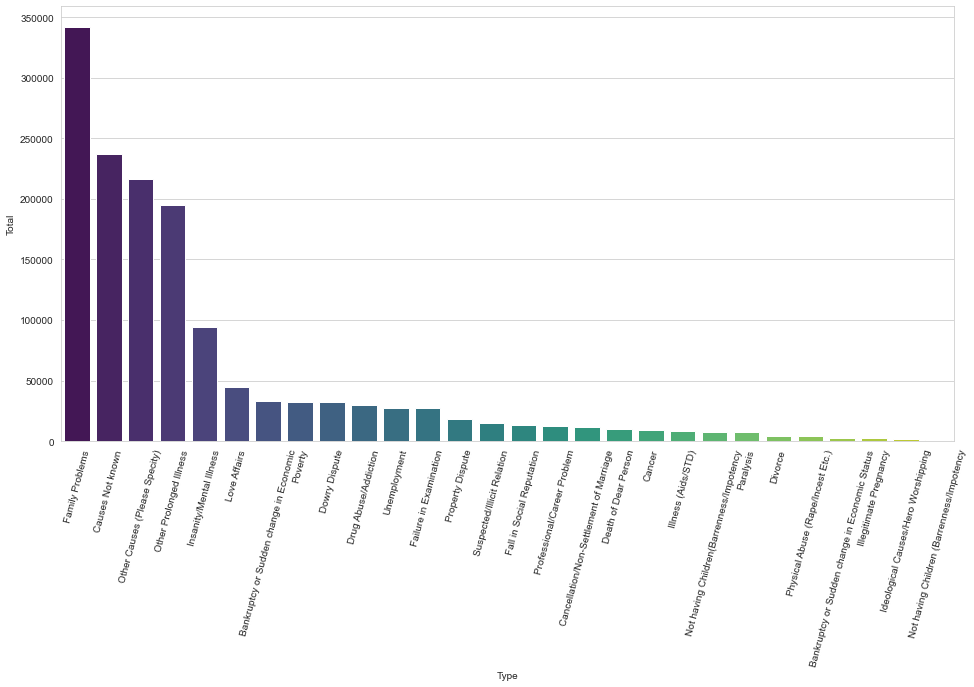

In [53]:
#plot based on different causes
fig, ax = plt.subplots(figsize=(16,8))
g = sns.barplot(x = 'Type', y = 'Total', data = suicide_reasons_cause, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 75)

Family problems comes out to be the top cause for committing suicide.

In [35]:
#grouping the ed_status dataset by type and creating a new dataframe for plotting.
filter_by_edustatus = edu_status.groupby('Type')['Total'].sum()
suicide_reasons_edu = pd.DataFrame(filter_by_edustatus).reset_index().sort_values('Total', ascending = False)

In [36]:
suicide_reasons_edu

,Type,Total
7,Primary,362827
4,Middle,342971
5,No Education,321757
3,Matriculate/Secondary,256566
2,Hr. Secondary/Intermediate/Pre-Universit,118908
1,Graduate,31274
0,Diploma,14153
6,Post Graduate and Above,7475


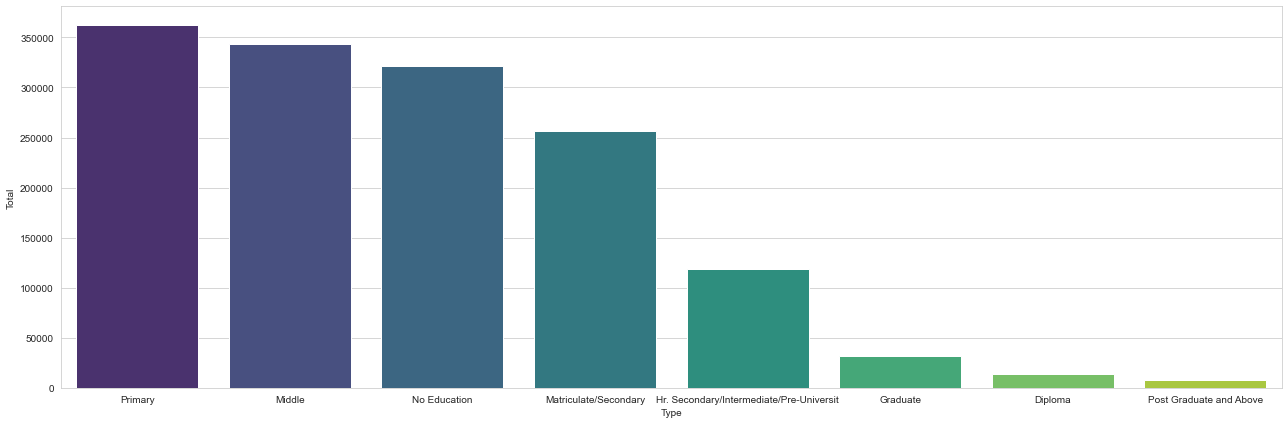

In [37]:
#plot based on different education levels
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = suicide_reasons_edu, palette = 'viridis')
plt.tight_layout()


Primary education status comes out to to be the top in terms of committing suicides followed by middle and no education.

In [38]:
#grouping the meansadopt dataset by type and creating a new dataframe for plotting.
filter_by_meansadopt = means_adpt.groupby('Type')['Total'].sum()
suicide_reason_meansadopt = pd.DataFrame(filter_by_meansadopt).reset_index().sort_values('Total', ascending = False)

In [39]:
suicide_reason_meansadopt

,Type,Total
5,By Hanging,460955
0,By Consuming Insecticides,275501
1,By Consuming Other Poison,231178
11,By Other means (please specify),135132
4,By Fire/Self Immolation,128006
2,By Drowning,96711
15,By coming under running vehicles/trains,45299
12,By Over Alcoholism,15973
16,By touching electric wires,10816
13,By Overdose of sleeping pills,9960


[Text(0, 0, 'By Hanging'),
 Text(1, 0, 'By Consuming Insecticides'),
 Text(2, 0, 'By Consuming Other Poison'),
 Text(3, 0, 'By Other means (please specify)'),
 Text(4, 0, 'By Fire/Self Immolation'),
 Text(5, 0, 'By Drowning'),
 Text(6, 0, 'By coming under running vehicles/trains'),
 Text(7, 0, 'By Over Alcoholism'),
 Text(8, 0, 'By touching electric wires'),
 Text(9, 0, 'By Overdose of sleeping pills'),
 Text(10, 0, 'By Other means'),
 Text(11, 0, 'By Jumping from (Other sites)'),
 Text(12, 0, 'By Jumping off Moving Vehicles/Trains'),
 Text(13, 0, 'By Jumping from (Building)'),
 Text(14, 0, 'By Fire-Arms'),
 Text(15, 0, 'By Self Infliction of injury'),
 Text(16, 0, 'By Machine')]

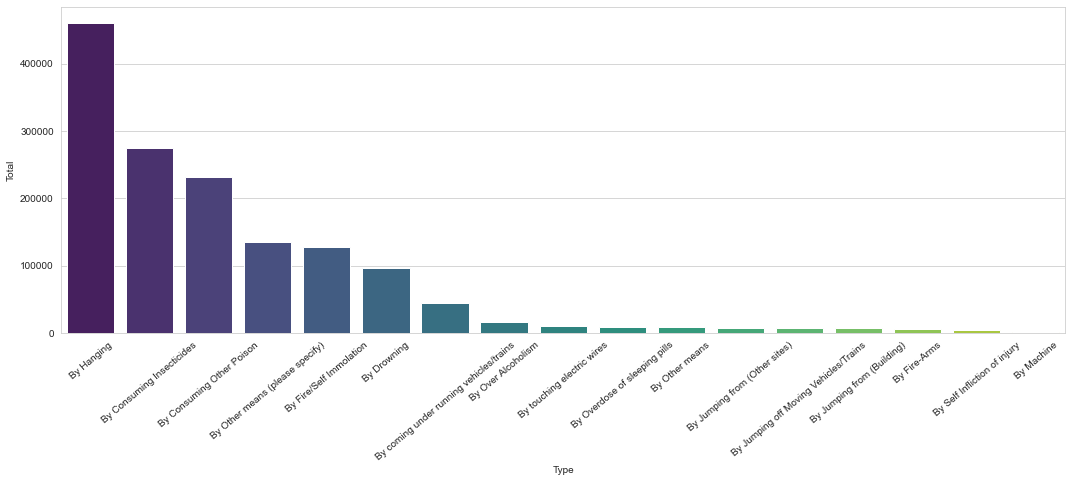

In [40]:
#plot based on different means adopted for committing suicide
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = suicide_reason_meansadopt, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 40)


Death by hanging is the top means adopted by the people for committing suicides followed by consuming insecticides and consuming other poision.

In [41]:
#grouping the professional status dataset by type and creating a new dataframe for plotting.
filter_by_prof = prof.groupby('Type')['Total'].sum()
suicide_reason_prof = pd.DataFrame(filter_by_prof).reset_index().sort_values('Total', ascending = False)

In [42]:
suicide_reason_prof

,Type,Total
2,Others (Please Specify),469147
1,House Wife,285243
0,Farming/Agriculture Activity,197923
8,Service (Private),115472
10,Unemployed,114374
6,Self-employed (Business activity),78112
9,Student,74323
3,Professional Activity,39204
4,Public Sector Undertaking,30786
7,Service (Government),23325


[Text(0, 0, 'Others (Please Specify)'),
 Text(1, 0, 'House Wife'),
 Text(2, 0, 'Farming/Agriculture Activity'),
 Text(3, 0, 'Service (Private)'),
 Text(4, 0, 'Unemployed'),
 Text(5, 0, 'Self-employed (Business activity)'),
 Text(6, 0, 'Student'),
 Text(7, 0, 'Professional Activity'),
 Text(8, 0, 'Public Sector Undertaking'),
 Text(9, 0, 'Service (Government)'),
 Text(10, 0, 'Retired Person')]

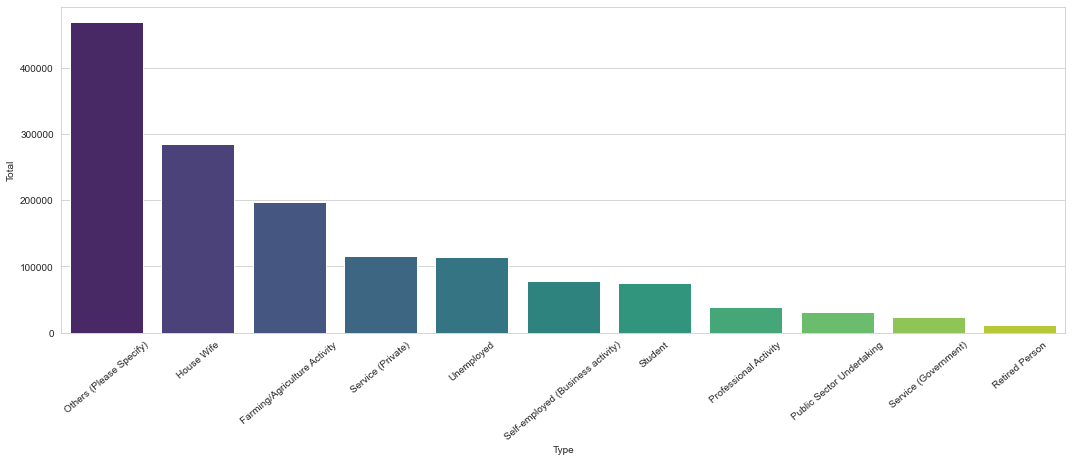

In [43]:
#plot based on different professional status of people
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = suicide_reason_prof, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 40)

Since other reasons doesn't give us a fair idea about the professional status of people who committed most suicides, we can say that the housewives are at the top in committing suicides in india followed by farmers and private sector employees.

In [44]:
#grouping the social_status dataset by type and creating a new dataframe for plotting.
filter_by_socstatus = soc_status.groupby('Type')['Total'].sum()
suicide_reason_socstatus = pd.DataFrame(filter_by_socstatus).reset_index().sort_values('Total', ascending = False)

[Text(0, 0, 'Married'),
 Text(1, 0, 'Never Married'),
 Text(2, 0, 'Widowed/Widower'),
 Text(3, 0, 'Seperated'),
 Text(4, 0, 'Divorcee')]

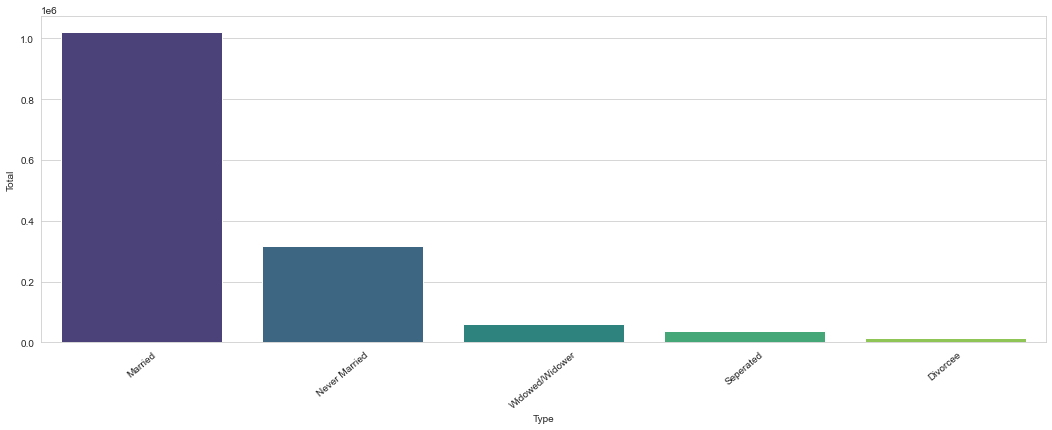

In [45]:
#plot based on different social status of people
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = suicide_reason_socstatus, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 40)

Married people committed the highest number of suicides followed by the people who never married.

In [46]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

Now, lets' do analysis for the reason behind suicides for lower and middle age groups.

In [47]:
lower_age = df[df['Age_group'] == '0-14']
lower_age_cause = lower_age[lower_age['Type_code'] == 'Causes']
lower_age_df = pd.DataFrame(lower_age_cause).reset_index().sort_values('Total', ascending = False)

[Text(0, 0, 'Causes Not known'),
 Text(1, 0, 'Failure in Examination'),
 Text(2, 0, 'Other Causes (Please Specity)'),
 Text(3, 0, 'Love Affairs'),
 Text(4, 0, 'Dowry Dispute'),
 Text(5, 0, 'Other Prolonged Illness'),
 Text(6, 0, 'Death of Dear Person'),
 Text(7, 0, 'Family Problems'),
 Text(8, 0, 'Insanity/Mental Illness'),
 Text(9, 0, 'Poverty'),
 Text(10, 0, 'Fall in Social Reputation'),
 Text(11, 0, 'Property Dispute'),
 Text(12, 0, 'Illness (Aids/STD)'),
 Text(13, 0, 'Suspected/Illicit Relation'),
 Text(14, 0, 'Physical Abuse (Rape/Incest Etc.)'),
 Text(15, 0, 'Drug Abuse/Addiction'),
 Text(16, 0, 'Bankruptcy or Sudden change in Economic'),
 Text(17, 0, 'Unemployment'),
 Text(18, 0, 'Illegitimate Pregnancy'),
 Text(19, 0, 'Paralysis'),
 Text(20, 0, 'Cancellation/Non-Settlement of Marriage'),
 Text(21, 0, 'Not having Children(Barrenness/Impotency'),
 Text(22, 0, 'Cancer'),
 Text(23, 0, 'Ideological Causes/Hero Worshipping'),
 Text(24, 0, 'Professional/Career Problem'),
 Text(25, 0, 

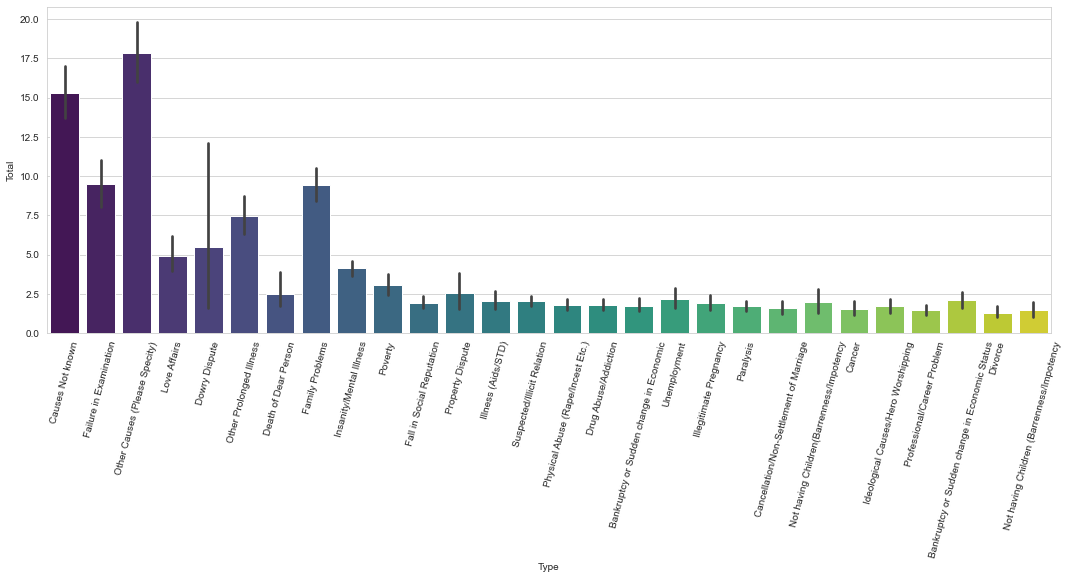

In [48]:
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = lower_age_df, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 75)

Most of the causes are unknown but failure due to examination remains at the top for the younger age group.

In [49]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [50]:
middle_age = df[df['Age_group'] == '15-29']
middle_age_cause = middle_age[middle_age['Type_code'] == 'Causes']
middle_age_df = pd.DataFrame(middle_age_cause).reset_index().sort_values('Total', ascending = False)

In [51]:
middle_age_df

,index,State,Year,Type_code,Type,Gender,Age_group,Total
7092,140911,Maharashtra,2011,Causes,Family Problems,Female,15-29,1406
7167,141506,Maharashtra,2012,Causes,Family Problems,Male,15-29,1362
7047,140348,Maharashtra,2010,Causes,Family Problems,Female,15-29,1354
7120,140942,Maharashtra,2011,Causes,Family Problems,Male,15-29,1354
11015,233623,West Bengal,2006,Causes,Family Problems,Female,15-29,1329
...,...,...,...,...,...,...,...,...
4115,86787,Haryana,2011,Causes,Paralysis,Male,15-29,1
6404,132980,Madhya Pradesh,2009,Causes,Property Dispute,Female,15-29,1
4770,103700,Jharkhand,2005,Causes,Professional/Career Problem,Male,15-29,1
4765,103693,Jharkhand,2005,Causes,Drug Abuse/Addiction,Female,15-29,1


[Text(0, 0, 'Family Problems'),
 Text(1, 0, 'Other Causes (Please Specity)'),
 Text(2, 0, 'Causes Not known'),
 Text(3, 0, 'Other Prolonged Illness'),
 Text(4, 0, 'Dowry Dispute'),
 Text(5, 0, 'Love Affairs'),
 Text(6, 0, 'Drug Abuse/Addiction'),
 Text(7, 0, 'Failure in Examination'),
 Text(8, 0, 'Insanity/Mental Illness'),
 Text(9, 0, 'Poverty'),
 Text(10, 0, 'Unemployment'),
 Text(11, 0, 'Fall in Social Reputation'),
 Text(12, 0, 'Death of Dear Person'),
 Text(13, 0, 'Property Dispute'),
 Text(14, 0, 'Bankruptcy or Sudden change in Economic'),
 Text(15, 0, 'Illness (Aids/STD)'),
 Text(16, 0, 'Cancellation/Non-Settlement of Marriage'),
 Text(17, 0, 'Bankruptcy or Sudden change in Economic Status'),
 Text(18, 0, 'Suspected/Illicit Relation'),
 Text(19, 0, 'Professional/Career Problem'),
 Text(20, 0, 'Physical Abuse (Rape/Incest Etc.)'),
 Text(21, 0, 'Not having Children(Barrenness/Impotency'),
 Text(22, 0, 'Illegitimate Pregnancy'),
 Text(23, 0, 'Not having Children (Barrenness/Impoten

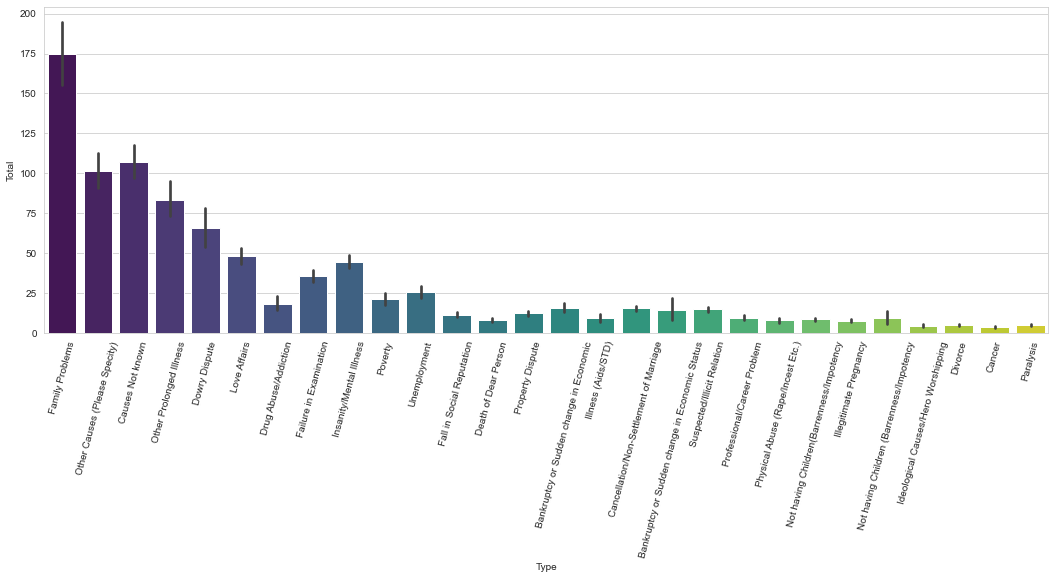

In [52]:
fig, ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'Type', y = 'Total', data = middle_age_df, palette = 'viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 75)

Family Problems remains at the top as the reason for committing suicides for the middle age population.